In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from sklearn import preprocessing, linear_model, metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, r2_score
import tensorflow as tf
import timeit

In [2]:
# load data apartemen
url = 'https://raw.githubusercontent.com/nyomanyoga/Damin/master/apt.csv'
data = pd.read_csv(url)
data = data[:29]
data

,Date,Sewa,Jual
0,2012-1,95.84,91.86
1,2021-2,100.36,98.56
2,2012-3,101.64,101.37
3,2012-4,102.16,108.21
4,2013-1,102.47,113.15
5,2013-2,103.18,124.33
6,2013-3,104.89,134.25
7,2013-4,109.47,137.51
8,2014-1,115.88,127.70
9,2014-2,147.29,126.59


In [3]:
# inflasi sewa
Inf_sewa=[0]
for i in range (data['Sewa'].count()-1):
  Inf_sewa.append((data['Sewa'][i+1]-data['Sewa'][i])/data['Sewa'][i+1]*100)
data[['inflasi_Sewa']]=pd.DataFrame(Inf_sewa)

# inflasi jual
Inf_jual=[0]
for i in range (data['Jual'].count()-1):
  Inf_jual.append((data['Jual'][i+1]-data['Jual'][i])/data['Jual'][i+1]*100)
data[['inflasi_Jual']]=pd.DataFrame(Inf_jual)

data

,Date,Sewa,Jual,inflasi_Sewa,inflasi_Jual
0,2012-1,95.84,91.86,0.000000,0.000000
1,2021-2,100.36,98.56,4.503786,6.797890
2,2012-3,101.64,101.37,1.259347,2.772023
3,2012-4,102.16,108.21,0.509005,6.321042
4,2013-1,102.47,113.15,0.302528,4.365886
5,2013-2,103.18,124.33,0.688118,8.992198
6,2013-3,104.89,134.25,1.630279,7.389199
7,2013-4,109.47,137.51,4.183795,2.370737
8,2014-1,115.88,127.70,5.531584,-7.682067
9,2014-2,147.29,126.59,21.325277,-0.876847


In [4]:
data.corr()

,Sewa,Jual,inflasi_Sewa,inflasi_Jual
Sewa,1.000000,0.746154,-0.122604,-0.496704
Jual,0.746154,1.000000,-0.042208,-0.319898
inflasi_Sewa,-0.122604,-0.042208,1.000000,-0.134848
inflasi_Jual,-0.496704,-0.319898,-0.134848,1.000000


First Experiment Ratio 60:40

In [5]:
X = (data['Sewa'])
y = (data['Jual'])
    
X_train = X[X.index < 17]
y_train = y[y.index < 17]              
    
X_test = X[X.index >= 17]    
y_test = y[y.index >= 17]

Random Forest

Lama eksekusi:  0.14922820599997522 detik


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array bef

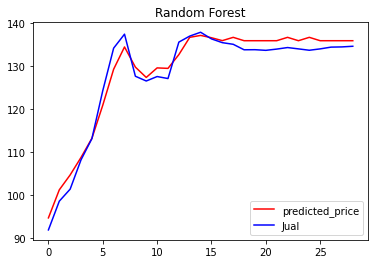

In [6]:
rf = RandomForestRegressor(n_estimators=100, max_features=1)

# model fitting

features = X_train[:, None]
labels = y_train[:, None]

start = timeit.default_timer() # catat waktu selesai

rgr = rf.fit(features, labels)

X_train_predict=pd.DataFrame(
    rgr.predict(X_train[:, None])).rename(
    columns={0:'predicted_price'})
X_test_predict=pd.DataFrame(
    rgr.predict(X_test[:, None])).rename(
    columns={0:'predicted_price'})

RF_predict = X_train_predict.append(X_test_predict)

RF_predict = RF_predict['predicted_price'].to_numpy()

RF_predict = pd.DataFrame(RF_predict).rename(columns={0:'predicted_price'})

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

RF_predict.plot(c='red', legend='Predict', title='Random Forest')
data['Jual'].plot(c='blue', legend='Jual')

In [7]:
RF_predict

,predicted_price
0,94.6659
1,101.2033
2,104.6837
3,108.7649
4,113.2199
5,120.9400
6,129.3376
7,134.5278
8,129.8265
9,127.4214


Multiple Regression

Lama eksekusi:  0.025519589999987602 detik


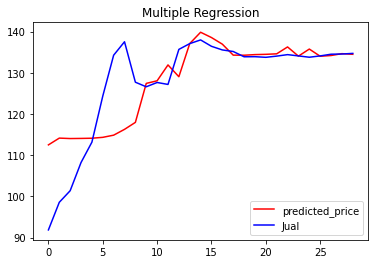

In [8]:
# Pemabgian Data Set
X_mr = data[['Sewa', 'inflasi_Sewa']]
y_mr = data['Jual']

X_train_mr = X_mr[X.index < 17]
y_train_mr = y_mr[y.index < 17]             

X_test_mr = X_mr[X.index >= 17]
y_test_mr = y_mr[y.index >= 17]

start = timeit.default_timer() # catat waktu selesai

# Model MR
regr_mr = linear_model.LinearRegression()
regr_mr.fit(X_train_mr, y_train_mr)

# Predict MR
predicted_train_mr = pd.DataFrame(regr_mr.predict(X_train_mr))
predicted_test_mr = pd.DataFrame(regr_mr.predict(X_test_mr))

# Join DataFrame
MR_predict = predicted_train_mr.append(predicted_test_mr)
MR_predict = MR_predict.to_numpy()
MR_predict = pd.DataFrame(MR_predict).rename(columns={0:'predicted_price'})

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

# Plot
MR_predict.plot(c='red', legend='Predict',title='Multiple Regression')
data['Jual'].plot(c='blue', legend='Jual')

In [9]:
MR_predict

,predicted_price
0,112.492689
1,114.135698
2,114.029769
3,114.058482
4,114.106036
5,114.323443
6,114.848762
7,116.259555
8,117.952732
9,127.410884


Backpropagation

In [ ]:
start = timeit.default_timer() # catat waktu mulai

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=1000, activation='relu'))
model.add(tf.keras.layers.Dense(units=4000, activation='relu'))
# model.add(tf.keras.layers.Dense(units=1000, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer, loss='mse')
model.fit(X_train_mr, y_train_mr, epochs=20000, batch_size=128)

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 50ms/step - loss: 3.3439
Epoch 17502/20000
1/1 [==============================] - 0s 57ms/step - loss: 3.3453
Epoch 17503/20000
1/1 [==============================] - 0s 57ms/step - loss: 3.3472
Epoch 17504/20000
1/1 [==============================] - 0s 71ms/step - loss: 3.3413
Epoch 17505/20000
1/1 [==============================] - 0s 63ms/step - loss: 3.3510
Epoch 17506/20000
1/1 [==============================] - 0s 57ms/step - loss: 3.3472
Epoch 17507/20000
1/1 [==============================] - 0s 63ms/step - loss: 3.3456
Epoch 17508/20000
1/1 [==============================] - 0s 65ms/step - loss: 3.3385
Epoch 17509/20000
1/1 [==============================] - 0s 87ms/step - loss: 3.3357
Epoch 17510/20000
1/1 [==============================] - 0s 73ms/step - loss: 3.3444
Epoch 17511/20000
1/1 [==============================] - 0s 82ms/step - loss: 3.3443
Epoch 17512/20000
1/1 [=========

In [ ]:
predicted_train = pd.DataFrame(model.predict(X_train_mr))
predicted_test = pd.DataFrame(model.predict(X_test_mr))

# Join DataFrame
BP = predicted_train.append(predicted_test)
BP = BP.to_numpy()
BP = pd.DataFrame(BP).rename(columns={0:'predicted_price'})

BP

,predicted_price
0,91.915504
1,98.802147
2,101.468582
3,114.562286
4,110.431137
5,120.958832
6,134.323486
7,137.552521
8,127.526558
9,126.620682


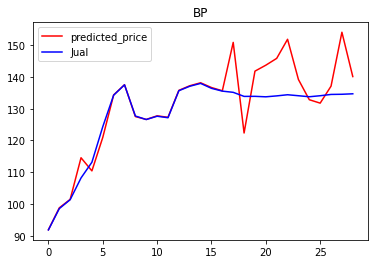

In [ ]:
BP.plot(c='red', legend='Predict',title='BP')
data['Jual'].plot(c='blue', legend='Jual')

Akurasi 60:40

In [ ]:
# Akurasi Random Forest
print('Akurasi Random Forest')
print('Mean Absolute Error RF\t\t:', metrics.mean_absolute_error(data['Jual'], RF_predict))
print('Mean Squared Error RF\t\t:', metrics.mean_squared_error(data['Jual'], RF_predict))
print('Root Mean Squared Error RF\t:', np.sqrt(metrics.mean_squared_error(data['Jual'], RF_predict)))
print('R2\t\t\t\t:', r2_score(data['Jual'], RF_predict))

print('\n')
# Akurasi Multiple Regression
print('Akurasi Multiple Regression')
print('Mean Absolute Error MR\t\t:', metrics.mean_absolute_error(data['Jual'], MR_predict))
print('Mean Squared Error MR\t\t:', metrics.mean_squared_error(data['Jual'], MR_predict))
print('Root Mean Squared Error MR\t:', np.sqrt(metrics.mean_squared_error(data['Jual'], MR_predict)))
print('R2\t\t\t\t:', r2_score(data['Jual'], MR_predict))

print('\n')
# Akurasi Backprogation
print('Akurasi Backprogation Algorithm')
print('Mean Absolute Error MR\t\t:', metrics.mean_absolute_error(data['Jual'], BP))
print('Mean Squared Error MR\t\t:', metrics.mean_squared_error(data['Jual'], BP))
print('Root Mean Squared Error MR\t:', np.sqrt(metrics.mean_squared_error(data['Jual'], BP)))
print('R2\t\t\t\t:', r2_score(data['Jual'], BP))

Akurasi Random Forest
Mean Absolute Error RF		: 1.8092413793103463
Mean Squared Error RF		: 4.643677784137977
Root Mean Squared Error RF	: 2.1549194379693124
R2				: 0.9699040993756461


Akurasi Multiple Regression
Mean Absolute Error MR		: 4.887308079135641
Mean Squared Error MR		: 68.05441168377594
Root Mean Squared Error MR	: 8.249509784452403
R2				: 0.5589360618258331


Akurasi Backprogation Algorithm
Mean Absolute Error MR		: 4.29366627660291
Mean Squared Error MR		: 51.5167423069729
Root Mean Squared Error MR	: 7.177516444214732
R2				: 0.6661174980191018


Second Experiment 70:30

In [33]:
X = (data['Sewa'])
y = (data['Jual'])
    
X_train = X[X.index < 20]
y_train = y[y.index < 20]              
    
X_test = X[X.index >= 20]    
y_test = y[y.index >= 20]

Random Forest

Lama eksekusi:  0.13934618300027068 detik


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a nump

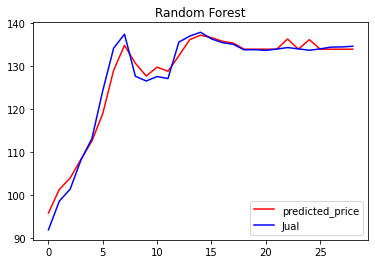

In [34]:
rf = RandomForestRegressor(n_estimators=100, max_features=1)

# model fitting
features = X_train[:, None]
labels = y_train[:, None]

start= timeit.default_timer() # catat waktu selesai

rgr = rf.fit(features, labels)

X_train_predict=pd.DataFrame(
    rgr.predict(X_train[:, None])).rename(
    columns={0:'predicted_price'})
X_test_predict=pd.DataFrame(
    rgr.predict(X_test[:, None])).rename(
    columns={0:'predicted_price'})

RF_predict = X_train_predict.append(X_test_predict)

RF_predict = RF_predict['predicted_price'].to_numpy()

RF_predict = pd.DataFrame(RF_predict).rename(columns={0:'predicted_price'})

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

RF_predict.plot(c='red', legend='Predict', title='Random Forest')
data['Jual'].plot(c='blue', legend='Jual')

In [35]:
RF_predict

,predicted_price
0,95.803700
1,101.284900
2,103.967400
3,108.341200
4,112.598600
5,118.992000
6,129.089400
7,134.905400
8,130.725000
9,127.759400


Multiple Regression

Lama eksekusi:  0.003939856999750191 detik


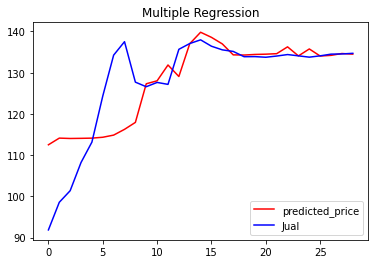

In [36]:
# Pemabgian Data Set
X_mr = data[['Sewa', 'inflasi_Sewa']]
y_mr = data['Jual']

X_train_mr = X_mr[X.index < 20]
y_train_mr = y_mr[y.index < 20]             

X_test_mr = X_mr[X.index >= 20]    
y_test_mr = y_mr[y.index >= 20]

start = timeit.default_timer() # catat waktu mulai

# Model MR
regr_mr = linear_model.LinearRegression()
regr_mr.fit(X_train_mr, y_train_mr)

# Predict MR
predicted_train_mr = pd.DataFrame(regr_mr.predict(X_train_mr))
predicted_test_mr = pd.DataFrame(regr_mr.predict(X_test_mr))

# Join DataFrame
MR_predict = predicted_train_mr.append(predicted_test_mr)
MR_predict = MR_predict.to_numpy()
MR_predict = pd.DataFrame(MR_predict).rename(columns={0:'predicted_price'})

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

# Plot
MR_predict.plot(c='red', legend='Predict',title='Multiple Regression')
data['Jual'].plot(c='blue', legend='Jual')

In [37]:
MR_predict

,predicted_price
0,112.507464
1,114.124929
2,114.037662
3,114.070703
4,114.119457
5,114.334696
6,114.854715
7,116.251141
8,117.936964
9,127.306432


Backpropagation

In [38]:
start = timeit.default_timer() # catat waktu mulai

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=1000, activation='relu'))
model.add(tf.keras.layers.Dense(units=4000, activation='relu'))
# model.add(tf.keras.layers.Dense(units=1000, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer, loss='mse')
model.fit(X_train_mr, y_train_mr, epochs=20000, batch_size=128)

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 63ms/step - loss: 3.0514
Epoch 17502/20000
1/1 [==============================] - 0s 63ms/step - loss: 3.0551
Epoch 17503/20000
1/1 [==============================] - 0s 52ms/step - loss: 3.0545
Epoch 17504/20000
1/1 [==============================] - 0s 51ms/step - loss: 3.0573
Epoch 17505/20000
1/1 [==============================] - 0s 52ms/step - loss: 3.0601
Epoch 17506/20000
1/1 [==============================] - 0s 60ms/step - loss: 3.0636
Epoch 17507/20000
1/1 [==============================] - 0s 77ms/step - loss: 3.0692
Epoch 17508/20000
1/1 [==============================] - 0s 68ms/step - loss: 3.0736
Epoch 17509/20000
1/1 [==============================] - 0s 67ms/step - loss: 3.0798
Epoch 17510/20000
1/1 [==============================] - 0s 59ms/step - loss: 3.0881
Epoch 17511/20000
1/1 [==============================] - 0s 57ms/step - loss: 3.0988
Epoch 17512/20000
1/1 [=========

In [39]:
predicted_train = pd.DataFrame(model.predict(X_train_mr))
predicted_test = pd.DataFrame(model.predict(X_test_mr))

# Join DataFrame
BP = predicted_train.append(predicted_test)
BP = BP.to_numpy()
BP = pd.DataFrame(BP).rename(columns={0:'predicted_price'})

In [40]:
BP

,predicted_price
0,91.160408
1,98.090599
2,100.833412
3,113.768806
4,110.351791
5,120.109673
6,133.799255
7,137.169540
8,127.342392
9,126.085686


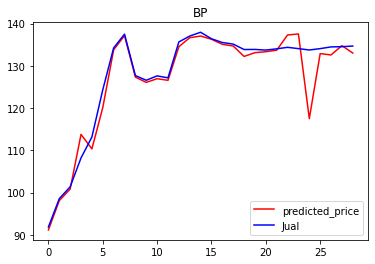

In [41]:
BP.plot(c='red', legend='Predict',title='BP')
data['Jual'].plot(c='blue', legend='Jual')

Akurasi 70:30

In [42]:
# Akurasi Random Forest
print('Akurasi Random Forest')
print('Mean Absolute Error RF\t\t:', metrics.mean_absolute_error(data['Jual'], RF_predict))
print('Mean Squared Error RF\t\t:', metrics.mean_squared_error(data['Jual'], RF_predict))
print('Root Mean Squared Error RF\t:', np.sqrt(metrics.mean_squared_error(data['Jual'], RF_predict)))
print('R2\t\t\t\t:', r2_score(data['Jual'], RF_predict))

print('\n')
# Akurasi Multiple Regression
print('Akurasi Multiple Regression')
print('Mean Absolute Error MR\t\t:', metrics.mean_absolute_error(data['Jual'], MR_predict))
print('Mean Squared Error MR\t\t:', metrics.mean_squared_error(data['Jual'], MR_predict))
print('Root Mean Squared Error MR\t:', np.sqrt(metrics.mean_squared_error(data['Jual'], MR_predict)))
print('R2\t\t\t\t:', r2_score(data['Jual'], MR_predict))

print('\n')
# Akurasi Backprogation
print('Akurasi Backprogation Algorithm')
print('Mean Absolute Error MR\t\t:', metrics.mean_absolute_error(data['Jual'], BP))
print('Mean Squared Error MR\t\t:', metrics.mean_squared_error(data['Jual'], BP))
print('Root Mean Squared Error MR\t:', np.sqrt(metrics.mean_squared_error(data['Jual'], BP)))
print('R2\t\t\t\t:', r2_score(data['Jual'], BP))

Akurasi Random Forest
Mean Absolute Error RF		: 1.5036057471264492
Mean Squared Error RF		: 4.5847735424207565
Root Mean Squared Error RF	: 2.1412084304011034
R2				: 0.9702858606191006


Akurasi Multiple Regression
Mean Absolute Error MR		: 4.882884197600117
Mean Squared Error MR		: 68.05591878186179
Root Mean Squared Error MR	: 8.24960112865233
R2				: 0.5589262942501461


Akurasi Backprogation Algorithm
Mean Absolute Error MR		: 1.77032684326172
Mean Squared Error MR		: 12.3345129497751
Root Mean Squared Error MR	: 3.5120525266252924
R2				: 0.9200594241800635


Third Experiment Ratio 80:20

In [43]:
X = (data['Sewa'])
y = (data['Jual'])
    
X_train = X[X.index < 25]
y_train = y[y.index < 25]              
    
X_test = X[X.index >= 25]    
y_test = y[y.index >= 25]

Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Lama eksekusi:  0.243939255999976 detik


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()


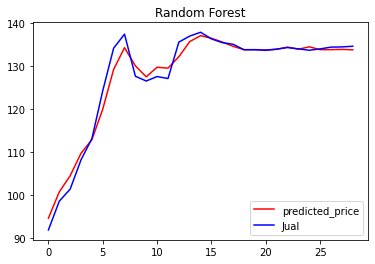

In [44]:
rf = RandomForestRegressor(n_estimators=100, max_features=1)

# model fitting

features = X_train[:, None]
labels = y_train[:, None]

start = timeit.default_timer() # catat waktu selesai

rgr = rf.fit(features, labels)

X_train_predict=pd.DataFrame(
    rgr.predict(X_train[:, None])).rename(
    columns={0:'predicted_price'})
X_test_predict=pd.DataFrame(
    rgr.predict(X_test[:, None])).rename(
    columns={0:'predicted_price'})

RF_predict = X_train_predict.append(X_test_predict)

RF_predict = RF_predict['predicted_price'].to_numpy()

RF_predict = pd.DataFrame(RF_predict).rename(columns={0:'predicted_price'})

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

RF_predict.plot(c='red', legend='Predict', title='Random Forest')
data['Jual'].plot(c='blue', legend='Jual')

In [45]:
RF_predict

,predicted_price
0,94.606300
1,100.726200
2,104.493800
3,109.740200
4,112.896200
5,120.046200
6,129.307000
7,134.362000
8,130.118800
9,127.563800


Multiple Regression

Lama eksekusi:  0.005494238999744994 detik


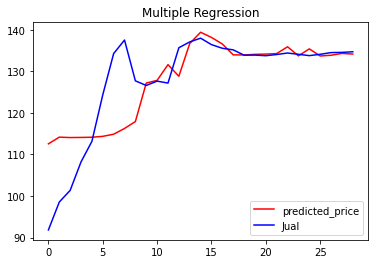

In [46]:
# Pemabgian Data Set
X_mr = data[['Sewa', 'inflasi_Sewa']]
y_mr = data['Jual']

X_train_mr = X_mr[X.index < 25]
y_train_mr = y_mr[y.index < 25]             

X_test_mr = X_mr[X.index >= 25]
y_test_mr = y_mr[y.index >= 25]

start = timeit.default_timer() # catat waktu selesai

# Model MR
regr_mr = linear_model.LinearRegression()
regr_mr.fit(X_train_mr, y_train_mr)

# Predict MR
predicted_train_mr = pd.DataFrame(regr_mr.predict(X_train_mr))
predicted_test_mr = pd.DataFrame(regr_mr.predict(X_test_mr))

# Join DataFrame
MR_predict = predicted_train_mr.append(predicted_test_mr)
MR_predict = MR_predict.to_numpy()
MR_predict = pd.DataFrame(MR_predict).rename(columns={0:'predicted_price'})

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

# Plot
MR_predict.plot(c='red', legend='Predict',title='Multiple Regression')
data['Jual'].plot(c='blue', legend='Jual')

In [47]:
MR_predict

,predicted_price
0,112.557989
1,114.163960
2,114.065312
3,114.094750
4,114.141789
5,114.354644
6,114.868945
7,116.250112
8,117.910575
9,127.172299


Backpropagation

In [48]:
start = timeit.default_timer() # catat waktu mulai

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(units=1000, activation='relu'))
model.add(tf.keras.layers.Dense(units=4000, activation='relu'))
# model.add(tf.keras.layers.Dense(units=1000, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer, loss='mse')
model.fit(X_train_mr, y_train_mr, epochs=20000, batch_size=128)

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

# optimizer.get_weights()


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 65ms/step - loss: 0.1647
Epoch 17502/20000
1/1 [==============================] - 0s 59ms/step - loss: 0.1749
Epoch 17503/20000
1/1 [==============================] - 0s 57ms/step - loss: 0.1922
Epoch 17504/20000
1/1 [==============================] - 0s 56ms/step - loss: 0.1978
Epoch 17505/20000
1/1 [==============================] - 0s 62ms/step - loss: 0.2250
Epoch 17506/20000
1/1 [==============================] - 0s 63ms/step - loss: 0.2685
Epoch 17507/20000
1/1 [==============================] - 0s 69ms/step - loss: 0.3231
Epoch 17508/20000
1/1 [==============================] - 0s 62ms/step - loss: 0.3739
Epoch 17509/20000
1/1 [==============================] - 0s 62ms/step - loss: 0.4832
Epoch 17510/20000
1/1 [==============================] - 0s 63ms/step - loss: 0.6015
Epoch 17511/20000
1/1 [==============================] - 0s 83ms/step - loss: 0.7207
Epoch 17512/20000
1/1 [=========

In [49]:
predicted_train = pd.DataFrame(model.predict(X_train_mr))
predicted_test = pd.DataFrame(model.predict(X_test_mr))

# Join DataFrame
BP = predicted_train.append(predicted_test)
BP = BP.to_numpy()
BP = pd.DataFrame(BP).rename(columns={0:'predicted_price'})

In [50]:
BP

,predicted_price
0,91.756340
1,98.333252
2,101.165497
3,108.526413
4,112.426430
5,124.240463
6,134.064941
7,137.196320
8,127.528015
9,126.369843


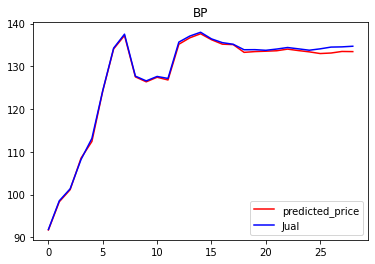

In [51]:
BP.plot(c='red', legend='Predict',title='BP')
data['Jual'].plot(c='blue', legend='Jual')

Akurasi 80:20

In [52]:
# Akurasi Random Forest
print('Akurasi Random Forest')
print('Mean Absolute Error RF\t\t:', metrics.mean_absolute_error(data['Jual'], RF_predict))
print('Mean Squared Error RF\t\t:', metrics.mean_squared_error(data['Jual'], RF_predict))
print('Root Mean Squared Error RF\t:', np.sqrt(metrics.mean_squared_error(data['Jual'], RF_predict)))
print('R2\t\t\t\t:', r2_score(data['Jual'], RF_predict))

print('\n')
# Akurasi Multiple Regression
print('Akurasi Multiple Regression')
print('Mean Absolute Error MR\t\t:', metrics.mean_absolute_error(data['Jual'], MR_predict))
print('Mean Squared Error MR\t\t:', metrics.mean_squared_error(data['Jual'], MR_predict))
print('Root Mean Squared Error MR\t:', np.sqrt(metrics.mean_squared_error(data['Jual'], MR_predict)))
print('R2\t\t\t\t:', r2_score(data['Jual'], MR_predict))

print('\n')
# Akurasi Backprogation
print('Akurasi Backprogation Algorithm')
print('Mean Absolute Error MR\t\t:', metrics.mean_absolute_error(data['Jual'], BP))
print('Mean Squared Error MR\t\t:', metrics.mean_squared_error(data['Jual'], BP))
print('Root Mean Squared Error MR\t:', np.sqrt(metrics.mean_squared_error(data['Jual'], BP)))
print('R2\t\t\t\t:', r2_score(data['Jual'], BP))

Akurasi Random Forest
Mean Absolute Error RF		: 1.3722101149425319
Mean Squared Error RF		: 3.81830995485674
Root Mean Squared Error RF	: 1.9540496295787217
R2				: 0.9752533482519219


Akurasi Multiple Regression
Mean Absolute Error MR		: 4.837548491382203
Mean Squared Error MR		: 68.01866722417813
Root Mean Squared Error MR	: 8.247343040287468
R2				: 0.5591677233996835


Akurasi Backprogation Algorithm
Mean Absolute Error MR		: 0.43654173752357284
Mean Squared Error MR		: 0.30767292409528746
Root Mean Squared Error MR	: 0.5546827238118089
R2				: 0.998005956877541


Jurnal "Analysis of Random Forest, Multiple Regression, and Backpropagation Methods in Predicting Apartment Price Index in Indonesia"

http://journal.uad.ac.id/index.php/JITEKI/article/view/20997